<a href="https://colab.research.google.com/github/ssk2001/AI-Tech-Lab-Experiments/blob/main/AI_LCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt


In [3]:
#load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

#one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [28]:
def build_model(base_model_name, activation='softmax', learning_rate=0.001):
    if base_model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    else:
        raise ValueError("Base model not supported.")

    #freeze the base model
    base_model.trainable = False

    #add custom top layers
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(10, activation=activation)(x)

    model = Model(inputs=base_model.input, outputs=output)

    #compile the model
    optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
#train the model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=20, batch_size=64):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return history, test_loss, test_accuracy


In [11]:
# using AdamW
# MobileNetV2 with softmax act func
model_1 = build_model('MobileNetV2', activation='softmax', learning_rate=0.001)
history_1, loss_1, accuracy_1 = train_and_evaluate(model_1, x_train, y_train, x_test, y_test)


<ipython-input-9-92628ebb6903>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.2251 - loss: 2.1785 - val_accuracy: 0.2941 - val_loss: 1.9972
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3016 - loss: 1.9738 - val_accuracy: 0.3020 - val_loss: 1.9429
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3159 - loss: 1.9232 - val_accuracy: 0.3084 - val_loss: 1.9215
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3160 - loss: 1.9050 - val_accuracy: 0.3068 - val_loss: 1.9113
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3149 - loss: 1.8933 - val_accuracy: 0.3110 - val_loss: 1.9049
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3212 - loss: 1.8856 - val_accuracy: 0.3120 - val_loss: 1.9011
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3211 - loss: 1.8794 - val_accuracy: 0.3124 - val_loss: 1.8984
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3240 - loss: 1.8761 - val_accura

In [15]:
# MobileNetV2 with softmax act func
model_2 = build_model('MobileNetV2', activation='softmax', learning_rate=0.0001)
history_2, loss_2, accuracy_2 = train_and_evaluate(model_2, x_train, y_train, x_test, y_test)


<ipython-input-9-92628ebb6903>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2222 - loss: 2.1775 - val_accuracy: 0.2951 - val_loss: 1.9964
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3022 - loss: 1.9699 - val_accuracy: 0.3024 - val_loss: 1.9426
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3075 - loss: 1.9321 - val_accuracy: 0.3085 - val_loss: 1.9222
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3158 - loss: 1.9064 - val_accuracy: 0.3081 - val_loss: 1.9112
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3195 - loss: 1.8958 - val_accuracy: 0.3110 - val_loss: 1.9054
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3190 - loss: 1.8914 - val_accuracy: 0.3106 - val_loss: 1.9016
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3184 - loss: 1.8838 - val_accuracy: 0.3141 - val_loss: 1.8982
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.3221 - loss: 1.8802 - val_accur

In [63]:
# ResNet50 with softmax act func
model_3 = build_model('ResNet50', activation='softmax', learning_rate=0.0001)
history_3, loss_3, accuracy_3 = train_and_evaluate(model_3, x_train, y_train, x_test, y_test)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.1885 - loss: 2.2175 - val_accuracy: 0.2840 - val_loss: 2.0151
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.2909 - loss: 1.9681 - val_accuracy: 0.3313 - val_loss: 1.8872
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3192 - loss: 1.8999 - val_accuracy: 0.3336 - val_loss: 1.8506
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3334 - loss: 1.8597 - val_accuracy: 0.3407 - val_loss: 1.8370
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3425 - loss: 1.8388 - val_accuracy: 0.3366 - val_loss: 1.8356
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3601 - loss: 1.7957 - val_accuracy: 0.3832 - val_loss: 1.7764
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3661 - loss: 1.7896 - val_accuracy: 0.3595 - val_loss: 1.7912
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.3647 - loss: 1.7772 - val_ac

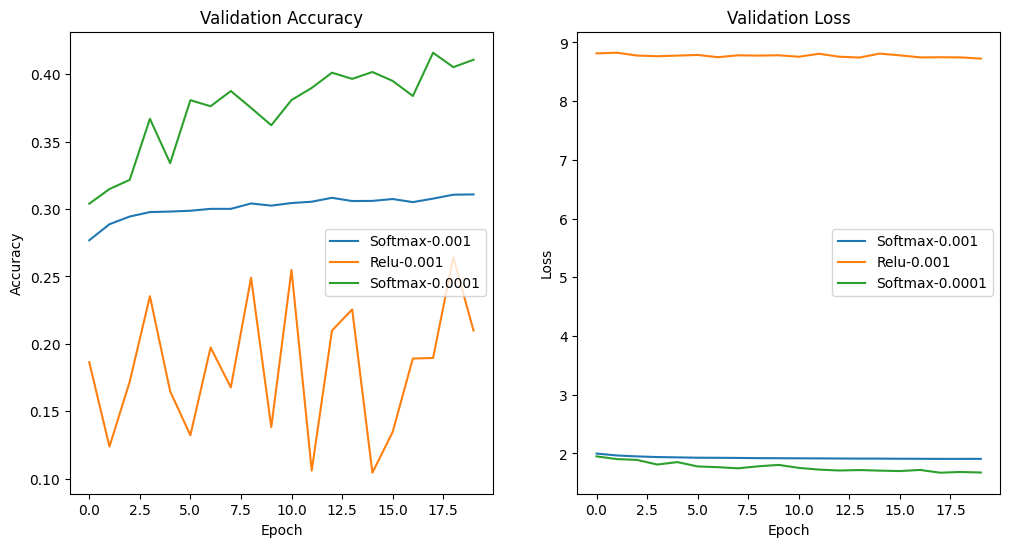

In [35]:
def plot_results(histories, labels):
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f'{labels[i]}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'{labels[i]}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_results([history_1, history_2, history_3], ['Softmax-0.001', 'Relu-0.001', 'Softmax-0.0001'])
